### 安裝 WebDriver 

1. 建立 chromedriver-win64 資料夾
2. 下載 Chrome Driver 並放置到剛剛建立的資料夾 

##### WebDriver  安裝教學

- WebDriver 安裝教學：  https://steam.oxxostudio.tw/category/python/spider/selenium.html#a4  
  
- WebDriver 下載網址：  https://chromedriver.chromium.org/downloads  

### 下載模組

在終端機輸入以下指令：

```
pip install -r requirements.txt
```

### 匯入模組

In [1]:
# 函式註解
from typing import *

# 網路爬蟲
import requests
from time import sleep
from requests.exceptions import InvalidSchema
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.remote.webelement import WebElement
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait

In [2]:
from transformers import (
   BertTokenizerFast,
   AutoModelForMaskedLM,
   AutoModelForCausalLM,
   AutoModelForTokenClassification,
)
from ckip_transformers.nlp import CkipWordSegmenter

c:\Users\raamii0617eric\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 定義 Class MemeGeneratorPredisAI

In [3]:
class MemeGeneratorPredisAI:
    def __init__(self, url: str) -> None:
        self.url = url

        self.chrome_options = Options()
        self.chrome_options.add_argument("--disable-gpu")

        # 關閉操作許可權的提示框
        self.chrome_options.add_argument('--disable-infobars')

        # 無頭模式
        # self.chrome_options.add_argument("--headless")

        # 關閉安全隔離，可以解決 Chrome Driver 無法啟動的問題
        self.chrome_options.add_argument("--no-sandbox")
    
    # 開啟瀏覽器
    def open_webdriver(self) -> None:
        # 初始化瀏覽器
        self.driver = webdriver.Chrome(
            './chromedriver-win64/chromedriver.exe', 
            options = self.chrome_options)
        
        # 設置智能等待
        # 注意!!! implicitly_wait 不要設定得太短
        self.driver.implicitly_wait(20)

        # 開啟瀏覽器，並固定視窗大小
        self.driver.get(self.url)
        self.driver.set_window_size(1200, 800)
        sleep(0.5)

    def generate_meme(self, text: str) -> str:
        # 輸入情境文本
        textarea = self.driver.find_element(By.CLASS_NAME, "MuiFilledInput-input")
        textarea.send_keys(text)
        sleep(0.5)
        
        # 點擊 "GENERATE" 按鈕
        btn_generate = self.driver.find_element(By.CLASS_NAME, "MuiButton-containedPrimary")
        btn_generate.click()
        sleep(15)

        # 獲取圖片 url
        img_url = self.driver.find_element(By.CLASS_NAME, "MuiAvatar-img").get_attribute("src")
        return img_url

    # 關閉瀏覽器
    def close(self) -> None:
        self.driver.quit()

### 文本預處理

直接輸入中文句子會報錯，因為至少要 4 個詞彙  
  
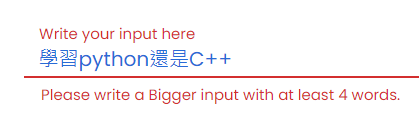  
  
因此要先斷詞，然後詞彙之間用空格做間隔  

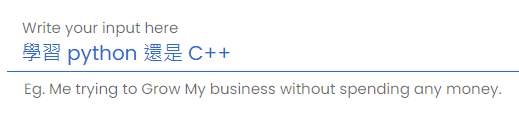  

In [4]:
def text_preprocessing(text: List[str]) -> List[str]:
    # 以下三種模型擇一
    # masked language model (ALBERT, BERT)
    tokenizer = BertTokenizerFast.from_pretrained('bert-base-chinese')
    model = AutoModelForMaskedLM.from_pretrained('ckiplab/albert-tiny-chinese') # or other models above

    # casual language model (GPT2)
    # tokenizer = BertTokenizerFast.from_pretrained('bert-base-chinese')
    # model = AutoModelForCausalLM.from_pretrained('ckiplab/gpt2-base-chinese') # or other models above

    # nlp task model
    # tokenizer = BertTokenizerFast.from_pretrained('bert-base-chinese')
    # model = AutoModelForTokenClassification.from_pretrained('ckiplab/albert-tiny-chinese-ws') # or other models above


    # Initialize drivers
    # tokenizer
    ws_driver = CkipWordSegmenter(model = "bert-base")

    # 斷詞
    ws_result = ws_driver(text)

    # 回傳斷詞結果，list[str]
    return ws_result[0]

### 主程式

In [5]:
def main():
    text = "你們抓捕周樹人跟我魯迅有甚麼關係"  # 輸入你想要的文本
    url = "https://predis.ai/free-ai-tools/ai-meme-generator/#"
    
    # 對輸入文本進行預處理，回傳 List[str]
    text = text_preprocessing([text])

    # 至少 4 個詞彙才會執行
    if len(text) >= 4:
        # 詞彙之間以空格做間隔
        text = " ".join(text)

        # 開始網路爬蟲
        Generator = MemeGeneratorPredisAI(url)
        Generator.open_webdriver()
        meme_url = Generator.generate_meme(text)
        Generator.close()
        
        # 儲存圖片
        response = requests.get(meme_url)
        with open("./pictures/result.jpg", "wb") as f:
            f.write(response.content)
    else:
        print("字數過少")

In [6]:
if __name__ == "__main__":
    main()

Inference: 100%|██████████| 1/1 [00:00<00:00,  9.66it/s]
C:\Users\raamii0617eric\AppData\Local\Temp\ipykernel_28620\901202159.py:20: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  self.driver = webdriver.Chrome(
